# Chapter 2 Gotchas

### 2.1 Symbols

In [3]:
from sympy import * #関数やクラスをすべてインポートする.
init_printing()

*コメント*: `python`で使う記号 `+`, `-`, `*`, `/`, `//`, `%` などは、`Sympy`でも同様に使える.

In [1]:
x + 1 #エラー

NameError: name 'x' is not defined

---> Python(オブジェクト)では「変数」は意味を持たない. 値を代入して初めて意味を持つ.

☆`sympy`で変数として使うときは、変数を`symbols`で定義しないといけない:

In [6]:
x = symbols('x') #引数は文字列(str)

In [7]:
type(x)

sympy.core.symbol.Symbol

*コメント*: 一つの変数を定義するときも、symbols()が使える。1変数用に`Symbols`が定義されているが、必要ないかも?

##### 複数の変数を定義する

In [4]:
x, y, z = symbols('x, y, z') #引数はスペースだけでも良い.

このようにして定義された変数は、(Pythonの変数とは違い)変数それ自体として意味を持つ. すなわち

In [5]:
a, b = symbols('a, b')

In [6]:
a

In [7]:
b

--->エラーなし

ところで

In [8]:
a, b = symbols('b a') #左辺: Sympyオブジェクト 右辺:pythonオブジェクト

とすると、

In [9]:
a

In [10]:
b

--->これは何を意味するか? `a`と名付けられたPython変数(左辺)は、`Sympy`シンボルの`b`(右辺)に対応している(残りも同様). これは非常に混乱しやすいので、通常は名前をそれぞれ一致させるようにする.

**例外**:・Sympyのシンボル名がPythonの予約語を含んでいるとき
    ・シンボル名(=Sympyの変数)がとても長く、短いPython変数で表したいとき

##### Python変数とSympyシンボルの違い

In [11]:
x = symbols('x')

In [12]:
expr = x + 1 #xはSympyシンボル

In [13]:
x = 2

In [14]:
print(expr)

x + 1


--->`3`が出力されない. `x = 2`はPython変数`x`を`2`にするが、`expr`式中の`x`は`Sympy`シンボルとして定義されており, `expr`には影響を与えない. 実際,

In [15]:
x

**例**:

In [9]:
x = 'abc'

In [10]:
expr = x + 'def'

In [11]:
expr

'abcdef'

In [12]:
x = 'ABC'

In [13]:
expr #'ABCdef'にならない.

'abcdef'

--->`Sympy`オブジェクトへの文字列の代入も同様にしてexprに影響を与えない.

**Q.** ではexprの値を評価するにはどうすればよいか？

In [17]:
x = symbols('x')

In [18]:
expr = x + 1

In [19]:
expr.subs({x:1}) #代入

### 2.4 等号

等号=, 真偽判定== もPythonと同様にして使える

In [20]:
x + 1 == 4

False

--->数式としてのイコール(=)とは違う!? (論理判定として使われている)
つまり、通常 a == b とすれば、私たちはa=bかと聞いている.

In [25]:
Eq(x + 1, 4) #等式を表す

**Q.** たとえば $$(x+1)^2=x^2+2x+1$$が正しいかどうか知りたいとき、上で用いた==は使えるだろうか？

In [26]:
(x + 1)**2 == x**2 + 2*x + 1 #使えない.

False

ここで、==は両辺の表式が完全に等しいか聞いている。*記号として等しくないと*`True`判定にならない(括弧の位置、変数の位置諸々異なる。)。

つまり「`a == b` を調べること「 (同じ) 「`a = b` を調べること」 (同じ) 「`a - b = 0`を調べること」

`Eq`関数を使うときは、`(右辺)=0`となるような式の左辺を第一引数に入れるようにする.

この間の式変形は`simplify()`関数で実行可能

In [27]:
a = (x + 1)**2

In [28]:
b = x**2 + 2*x + 1

In [29]:
simplify(a - b) #確かめられた.

In [30]:
c = x**2 - 2*x + 1

In [31]:
simplify(a - c)

##### 任意の点で等しいかどうか調べる方法

In [32]:
a = cos(x)**2 - sin(x)**2

In [33]:
b = cos(2*x)

In [34]:
a.equals(b) #equalsメソッドを使う.

True

### 2.5 ^ と /

`^` : or, `/` : and (論理判定)

In [35]:
True ^ False

True

In [36]:
True ^ True

False

In [37]:
x ^ y 

**注意**: べき乗として`^`を使ってはいけない.

##### コメント

`Sympy`オブジェクト + `Sympy`オブジェクト,
`Sympy`オブジェクト + `Python`オブジェクト 

--> これらすべてSympyオブジェクトを与える.

In [38]:
type(Integer(1) + 1) #Sympyオブジェクト+ Pythonオブジェクト

sympy.core.numbers.Integer

In [39]:
type(1 + 1) #Pythonオブジェクト + Pythonオブジェクト = Pythonオブジェクト

int

##### 注意 : 割り算

In [40]:
Integer(1) / Integer (3)

In [41]:
type(Integer(1) / Integer (3))

sympy.core.numbers.Rational

In [42]:
1 / 3

Pythonでの計算なら、上のように浮動小数点数で得られる. 浮動小数点数としてほしくないときは

In [43]:
Rational(1,3)

In [44]:
type(Rational(1,3))

sympy.core.numbers.Rational

のように定義する。このようにすれば

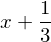

In [45]:
x + Rational(1,3)

In [46]:
type(x + Rational(1,3))

sympy.core.add.Add

とおけて、 丸め誤差を防ぐことができる。

このあたりの注意については
http://docs.sympy.org/latest/gotchas.html#gotchas
を読む。